<a href="https://colab.research.google.com/github/matheusfsm/datascience_steps/blob/master/Analisando_a_Viol%C3%AAncia_no_Rio_de_Janeiro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center><img alt="Colaboratory logo" width="40%" src="https://raw.githubusercontent.com/matheusfsm/datascience_steps/master/datahivelogo5.jpg">

---
  

# Analisando a Violência no Rio de Janeiro

Sabemos que a violência assola o Brasil com índices altissímos anualmente, trazendo um mal histórico para um dos estados mais turísticos do país.

Nessa análise vamos focar no estado do Rio de Janeiro, que tem a má fama de ser um dos estados mais violentos do Brasil!

## Obtenção dos Dados

Esse arquivo pode ser encontrado no [ISP dados](http://www.ispdados.rj.gov.br/estatistica.html), que faz parte de uma rede de [Dados abertos](http://www.dados.gov.br/), um portal do governo que compartilha informações sobre o administração pública.

In [ ]:
# importando as bibliotecas
import pandas as pd
import matplotlib as plt
import seaborn as sns 

### Importando os dados

Importe os dados, usando `df = pd.read_csv("endereço_do_csv")`

In [ ]:
df_v = pd.read_csv('https://raw.githubusercontent.com/carlosfab/dsnp2/master/datasets/violencia_rio.csv')

## Análise Inicial dos Dados

Iniciaremos uma análise exploratória com a finalidade de obtermos uma consciência situacional das informações computadas no ```dataset```.

Descreva e execute as seguintes etapas:

* Qual o tamanho do seu DataFrame (`shape`)
* Extrair e imprimir os nomes das colunas (`columns`)
* Quais os tipos das variáveis (`dtypes`)
* Visualizar as 5 primeiras linhas (`head`)
* Identifique a porcentagem de valores ausentes das colunas


In [ ]:
# imprimindo o volume de dados do dataframe
print('Entradas:\t {}'.format(df_v.shape[0]))
print('Variáveis:\t {}'.format(df_v.shape[1]))

Entradas:	 344
Variáveis:	 56


In [ ]:
# imprimindo nomes atríbuidos as colunas

df_v.columns

Index(['vano', 'mes', 'hom_doloso', 'lesao_corp_morte', 'latrocinio',
       'hom_por_interv_policial', 'tentat_hom', 'lesao_corp_dolosa', 'estupro',
       'hom_culposo', 'lesao_corp_culposa', 'roubo_comercio',
       'roubo_residencia', 'roubo_veiculo', 'roubo_carga', 'roubo_transeunte',
       'roubo_em_coletivo', 'roubo_banco', 'roubo_cx_eletronico',
       'roubo_celular', 'roubo_conducao_saque', 'roubo_apos_saque',
       'roubo_bicicleta', 'outros_roubos', 'total_roubos', 'furto_veiculos',
       'furto_transeunte', 'furto_coletivo', 'furto_celular',
       'furto_bicicleta', 'outros_furtos', 'total_furtos', 'sequestro',
       'extorsao', 'sequestro_relampago', 'estelionato', 'apreensao_drogas',
       'posse_drogas', 'trafico_drogas', 'apreensao_drogas_sem_autor',
       'recuperacao_veiculos', 'apf', 'aaapai', 'cmp', 'cmba', 'ameaca',
       'pessoas_desaparecidas', 'encontro_cadaver', 'encontro_ossada',
       'pol_militares_mortos_serv', 'pol_civis_mortos_serv',
       'ind

In [ ]:
#imprimindo tipo das variáveis
df_v.dtypes

vano                            int64
mes                             int64
hom_doloso                      int64
lesao_corp_morte              float64
latrocinio                      int64
hom_por_interv_policial       float64
tentat_hom                      int64
lesao_corp_dolosa               int64
estupro                       float64
hom_culposo                   float64
lesao_corp_culposa            float64
roubo_comercio                  int64
roubo_residencia                int64
roubo_veiculo                   int64
roubo_carga                     int64
roubo_transeunte                int64
roubo_em_coletivo               int64
roubo_banco                     int64
roubo_cx_eletronico           float64
roubo_celular                 float64
roubo_conducao_saque          float64
roubo_apos_saque              float64
roubo_bicicleta               float64
outros_roubos                   int64
total_roubos                    int64
furto_veiculos                  int64
furto_transe

In [ ]:
#imprimindo entradas iniciais do dataframe
df_v.head()

,vano,mes,hom_doloso,lesao_corp_morte,latrocinio,hom_por_interv_policial,tentat_hom,lesao_corp_dolosa,estupro,hom_culposo,lesao_corp_culposa,roubo_comercio,roubo_residencia,roubo_veiculo,roubo_carga,roubo_transeunte,roubo_em_coletivo,roubo_banco,roubo_cx_eletronico,roubo_celular,roubo_conducao_saque,roubo_apos_saque,roubo_bicicleta,outros_roubos,total_roubos,furto_veiculos,furto_transeunte,furto_coletivo,furto_celular,furto_bicicleta,outros_furtos,total_furtos,sequestro,extorsao,sequestro_relampago,estelionato,apreensao_drogas,posse_drogas,trafico_drogas,apreensao_drogas_sem_autor,recuperacao_veiculos,apf,aaapai,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,indicador_letalidade,indicador_roubo_rua,indicador_roubo_veic,registro_ocorrencias,fase
0,1991,1,657,NaN,15,NaN,162,3051,NaN,NaN,NaN,350,188,1174,63,967,381,37,NaN,NaN,NaN,NaN,NaN,158,3318,2009,1147,NaN,NaN,NaN,3561,6717,NaN,NaN,NaN,NaN,133,NaN,NaN,NaN,872,NaN,NaN,NaN,NaN,NaN,NaN,217,NaN,NaN,NaN,672,1348,1174,NaN,3
1,1991,2,732,NaN,17,NaN,175,3421,NaN,NaN,NaN,357,171,1097,64,963,432,35,NaN,NaN,NaN,NaN,NaN,142,3261,1850,1066,NaN,NaN,NaN,3309,6225,NaN,NaN,NaN,NaN,127,NaN,NaN,NaN,751,NaN,NaN,NaN,NaN,NaN,NaN,209,NaN,NaN,NaN,749,1395,1097,NaN,3
2,1991,3,713,NaN,25,NaN,216,3613,NaN,NaN,NaN,443,191,1265,71,963,422,43,NaN,NaN,NaN,NaN,NaN,131,3529,2084,1062,NaN,NaN,NaN,3573,6719,NaN,NaN,NaN,NaN,80,NaN,NaN,NaN,789,NaN,NaN,NaN,NaN,NaN,NaN,188,NaN,NaN,NaN,738,1385,1265,NaN,3
3,1991,4,634,NaN,20,NaN,200,3211,NaN,NaN,NaN,425,199,1415,81,1186,354,36,NaN,NaN,NaN,NaN,NaN,112,3808,2085,1195,NaN,NaN,NaN,3290,6570,NaN,NaN,NaN,NaN,133,NaN,NaN,NaN,787,NaN,NaN,NaN,NaN,NaN,NaN,140,NaN,NaN,NaN,654,1540,1415,NaN,3
4,1991,5,650,NaN,20,NaN,146,3051,NaN,NaN,NaN,553,231,1449,82,931,335,27,NaN,NaN,NaN,NaN,NaN,147,3755,2185,723,NaN,NaN,NaN,3546,6454,NaN,NaN,NaN,NaN,163,NaN,NaN,NaN,845,NaN,NaN,NaN,NaN,NaN,NaN,78,NaN,NaN,NaN,670,1266,1449,NaN,3


In [ ]:
#imprimindo em ordem crescente a taxa percentual de valores nulos no dataframe

(df_v.isnull().sum().sort_values(ascending= False) / df_v.shape[0]*100)


roubo_bicicleta               80.232558
furto_bicicleta               80.232558
apreensao_drogas_sem_autor    52.325581
posse_drogas                  52.325581
apf                           52.325581
aaapai                        52.325581
cmp                           52.325581
trafico_drogas                52.325581
cmba                          52.325581
sequestro_relampago           41.860465
furto_coletivo                41.860465
extorsao                      41.860465
furto_celular                 41.860465
roubo_apos_saque              41.860465
roubo_conducao_saque          41.860465
roubo_cx_eletronico           41.860465
estupro                       41.860465
estelionato                   41.860465
pol_civis_mortos_serv         41.860465
pol_militares_mortos_serv     41.860465
pessoas_desaparecidas         38.372093
encontro_ossada               38.372093
roubo_celular                 31.395349
lesao_corp_culposa            27.906977
ameaca                        27.906977


In [ ]:
#preenchendo valores nulos com a média dos valores presentes

df_v.fillna(df_v.mean(), inplace=True)

In [ ]:
#imprimindo em ordem crescente a taxa percentual de valores nulos no dataframe

df_v.isnull().sum()

vano                          0
mes                           0
hom_doloso                    0
lesao_corp_morte              0
latrocinio                    0
hom_por_interv_policial       0
tentat_hom                    0
lesao_corp_dolosa             0
estupro                       0
hom_culposo                   0
lesao_corp_culposa            0
roubo_comercio                0
roubo_residencia              0
roubo_veiculo                 0
roubo_carga                   0
roubo_transeunte              0
roubo_em_coletivo             0
roubo_banco                   0
roubo_cx_eletronico           0
roubo_celular                 0
roubo_conducao_saque          0
roubo_apos_saque              0
roubo_bicicleta               0
outros_roubos                 0
total_roubos                  0
furto_veiculos                0
furto_transeunte              0
furto_coletivo                0
furto_celular                 0
furto_bicicleta               0
outros_furtos                 0
total_fu

## Informações Estatísticas da Violência no Rio de Janeiro


In [ ]:
#imprimindo o resumo estatístico do dataframe

df_v.describe()

,vano,mes,hom_doloso,lesao_corp_morte,latrocinio,hom_por_interv_policial,tentat_hom,lesao_corp_dolosa,estupro,hom_culposo,lesao_corp_culposa,roubo_comercio,roubo_residencia,roubo_veiculo,roubo_carga,roubo_transeunte,roubo_em_coletivo,roubo_banco,roubo_cx_eletronico,roubo_celular,roubo_conducao_saque,roubo_apos_saque,roubo_bicicleta,outros_roubos,total_roubos,furto_veiculos,furto_transeunte,furto_coletivo,furto_celular,furto_bicicleta,outros_furtos,total_furtos,sequestro,extorsao,sequestro_relampago,estelionato,apreensao_drogas,posse_drogas,trafico_drogas,apreensao_drogas_sem_autor,recuperacao_veiculos,apf,aaapai,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,indicador_letalidade,indicador_roubo_rua,indicador_roubo_veic,registro_ocorrencias,fase
count,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000,344.00000,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000
mean,2004.837209,6.453488,504.555233,4.334677,15.668605,71.900000,318.267442,5492.799419,369.945000,212.119231,3410.762097,455.005814,133.284884,2448.697674,340.322674,3418.520349,659.002907,9.375000,3.550000,957.974576,11.320000,145.665000,10.808824,1211.223837,9428.119186,1674.671512,1518.921512,650.230000,1449.175000,124.808824,5994.328488,10433.177326,0.665323,133.26500,7.755000,2231.860000,1071.930233,609.237805,759.146341,186.146341,1772.238372,2319.585366,568.628049,1255.512195,83.042683,5530.326613,435.132075,66.261628,3.301887,2.085000,0.340000,577.691860,4734.738372,2448.697674,53794.161290,2.994186
std,8.289036,3.447759,113.774481,2.338187,5.861427,31.707547,127.606645,1514.220579,71.897976,47.128115,658.644015,119.765076,44.317963,789.689559,223.855243,2459.017549,297.622342,10.564894,2.006912,516.757145,4.877963,42.191931,3.433039,800.576723,4578.013053,294.852020,971.853102,204.770478,280.789261,35.466755,1964.767779,3696.725756,0.813913,32.98418,3.876743,588.097223,643.381991,169.794935,215.681417,24.969514,656.761843,448.443748,170.989543,246.126333,43.396225,934.095213,51.258173,34.464519,1.719956,1.341809,0.485594,104.973929,3204.054864,789.689559,9367.704775,0.076138
min,1991.000000,1.000000,272.000000,0.000000,2.000000,10.000000,122.000000,2350.000000,188.000000,111.000000,848.000000,243.000000,49.000000,1097.000000,59.000000,688.000000,281.000000,0.000000,0.000000,0.000000,1.000000,11.000000,0.000000,81.000000,3261.000000,1159.000000,322.000000,23.000000,484.000000,0.000000,2322.000000,4691.000000,0.000000,23.00000,0.000000,717.000000,80.000000,248.000000,262.000000,114.000000,729.000000,1173.000000,225.000000,628.000000,21.000000,1409.000000,236.000000,0.000000,0.000000,0.000000,0.000000,334.000000,1086.000000,1097.000000,30621.000000,2.000000
25%,1998.000000,3.000000,413.750000,3.000000,11.000000,49.000000,200.000000,4067.000000,358.250000,185.000000,3200.750000,365.750000,103.750000,1889.750000,208.250000,1053.000000,430.750000,2.000000,3.000000,624.000000,9.000000,142.000000,10.808824,811.750000,5107.750000,1430.500000,732.000000,650.230000,1424.500000,124.808824,3978.000000,6700.250000,0.000000,126.00000,6.000000,2034.250000,714.500000,609.237805,759.146341,186.000000,1276.750000,2319.585366,539.750000,1255.512195,59.000000,5108.500000,413.000000,42.000000,2.000000,1.000000,0.000000,500.000000,1557.000000,1889.750000,50102.750000,3.000000
50%,2005.000000,6.000000,507.000000,4.334677,15.000000,71.900000,318.500000,5830.500000,369.945000,212.119231,3410.762097,433.500000,125.000000,2

In [ ]:
#imprimindo a média de roubo_veiculo

df_v.roubo_veiculo.mean()

2448.6976744186045

In [ ]:
#imprimindo a média de furto_veiculos

df_v.furto_veiculos.mean()

1674.671511627907

In [ ]:
#imprimindo a média de recuperacao_veiculos

df_v.recuperacao_veiculos.mean()

1772.2383720930231

In [ ]:
# percentual de carros recuperados

df_v.recuperacao_veiculos / (df_v.furto_veiculos + df_v.recuperacao_veiculos).sort_values(ascending= False) * 100

0      30.267268
1      28.873510
2      27.462583
3      27.402507
4      27.887789
         ...    
339    67.838676
340    62.340967
341    61.998785
342    63.511327
343    60.459035
Length: 344, dtype: float64

In [ ]:
# imprimindo valor maximo para hom_doloso

df_v['hom_doloso'].max()

831

In [ ]:
# imprimindo valor minimo para hom_doloso

df_v['hom_doloso'].min()

272

## Visualização de Dados

Para ampliar o entendimento em relação aos dados, iremos usar a função ```.hist()```,  que ilustra com histogramas o nosso dataframe.



array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f8c060b0b00>]],
      dtype=object)

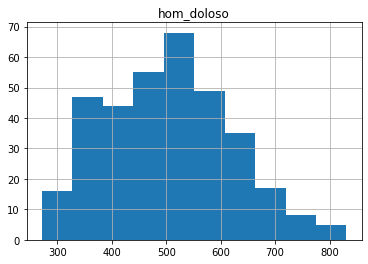

In [ ]:
#plotando histograma sobre os homicios dolosos

df_v.hist('hom_doloso')

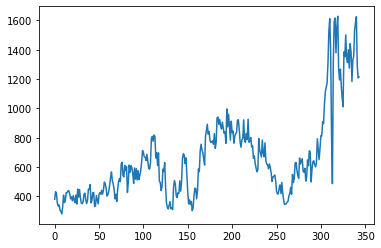

In [ ]:
#plotando grafico de linhas da variável roubo_em_coletivo

rc = df_v['roubo_em_coletivo']


rc.plot()

## Conclusão

Analisando os dados podemos ver que muitos crimes continuam aumentando, sabemos que que esse é um assunto extremamente delicado e complexo, pois afeta leis, lentidão em processos judiciais, e um sistema de reclusão não eficiente, impunidade e consecultivamente elevando os índices de criminalidade.